In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd

# File path to the CSV in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/electionuk.csv'

# Loading the CSV into a DataFrame
election = pd.read_csv(file_path)

# Verifying first 5 rows
election.head()

,Election_Year,Age_Group,Turnout_Percent
0,1997,18-24,54.1
1,1997,25-34,62.2
2,1997,35-54,73.3
3,1997,55+,78.8
4,2001,18-24,40.4


**STEP 1: Dataset Verification and Cleaning**

Checked columns, types, missing values, and basic stats — all looks clean and ready.


In [21]:
# 1. Standardize column names
election.columns = election.columns.str.strip()
election.columns = ['Election_Year', 'Age_Group', 'Turnout_Percent']

# 2. Convert data types
election['Election_Year'] = election['Election_Year'].astype(int)
election['Turnout_Percent'] = election['Turnout_Percent'].astype(float)

# 3. Basic dataset inspection
print("First 5 rows:\n", election.head(), "\n")
print("Last 5 rows:\n", election.tail(), "\n")
print("Dataset shape:\n", election.shape, "\n")

# 4. Missing value check
print("Missing values per column:\n", election.isnull().sum(), "\n")

# 5. Validate categorical and temporal coverage
print("Unique age groups:\n", election['Age_Group'].unique(), "\n")
print("Election years covered:\n", sorted(election['Election_Year'].unique()), "\n")

# 6. Statistical summary of turnout
print("Turnout percentage summary:\n", election['Turnout_Percent'].describe())

First 5 rows:
    Election_Year Age_Group  Turnout_Percent
0           1997     18-24             54.1
1           1997     25-34             62.2
2           1997     35-54             73.3
3           1997       55+             78.8
4           2001     18-24             40.4 

Last 5 rows:
     Election_Year Age_Group  Turnout_Percent
23           2017       55+            83.85
24           2019     18-24            54.50
25           2019     25-34            54.40
26           2019     35-54            65.95
27           2019       55+            75.65 

Dataset shape:
 (28, 3) 

Missing values per column:
 Election_Year      0
Age_Group          0
Turnout_Percent    0
dtype: int64 

Unique age groups:
 ['18-24' '25-34' '35-54' '55+'] 

Election years covered:
 [np.int64(1997), np.int64(2001), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2017), np.int64(2019)] 

Turnout percentage summary:
 count    28.000000
mean     60.528571
std      12.029743
min      38.200000
25

**Observations and Insights**






• Dataset contains 28 records across 7 elections and 4 age groups.

• No missing values were found; data types and ranges are consistent.

• Turnout varies widely (≈38% to ≈84%), suggesting meaningful variation to analyse further.




**STEP 2: Turnout Change Analysis**

Checked how turnout changes from one election to the next to understand which age groups fluctuate more.

In [22]:
# Sort data by age group and election year
election = election.sort_values(by=['Age_Group', 'Election_Year'])

# Calculate turnout change between elections for each age group
election['Turnout_Change'] = election.groupby('Age_Group')['Turnout_Percent'].diff()

# Quick check of the results
election.head()

,Election_Year,Age_Group,Turnout_Percent,Turnout_Change
0,1997,18-24,54.1,NaN
4,2001,18-24,40.4,-13.7
8,2005,18-24,38.2,-2.2
12,2010,18-24,51.8,13.6
16,2015,18-24,51.6,-0.2


In [23]:
# Summary statistics for turnout change
election['Turnout_Change'].describe()

,Turnout_Change
count,24.000000
mean,-0.745833
std,7.753553
min,-17.200000
25%,-3.625000
50%,-0.200000
75%,4.225000
max,13.600000


**Observations & Insights**


•	First election per age group shows NaN, as expected.

•	There are 24 valid turnout changes across age groups.

•	Average change is close to zero, but the spread is high (std ~7.75).

•	Minimum and maximum changes (-17.2 to 13.6) show turnout can swing significantly.

•	Turnout is unstable; movement between elections matters more than static levels.

**STEP 3: Volatility and Distribution of Turnout Changes**

Analysed the distribution and volatility of turnout changes across elections to understand how stable or unstable voter participation is over time.

**PART 1: Calculating Turnout Change**

In [24]:
# Calculate turnout change between consecutive elections for each age group
election['Turnout_Change'] = election.groupby('Age_Group')['Turnout_Percent'].diff()

# Summary statistics for turnout change
election['Turnout_Change'].describe()

,Turnout_Change
count,24.000000
mean,-0.745833
std,7.753553
min,-17.200000
25%,-3.625000
50%,-0.200000
75%,4.225000
max,13.600000


**Observations & Insights**

•	Turnout changes show high variability across elections.

•	Mean change is close to zero, indicating no consistent overall trend.

•	Large positive and negative values suggest uneven participation shifts.

•	Volatility justifies further analysis by age group.

**PART 2: Volatility by Age Group**

Measured how turnout changes vary across age groups to see which groups are most unstable and which are consistent.

In [25]:
# Calculate volatility (standard deviation) of turnout change per age group
volatility_by_age = election.groupby('Age_Group')['Turnout_Change'].std()

# Display results
volatility_by_age

,Turnout_Change
Age_Group,
18-24,9.179470
25-34,9.287411
35-54,6.425399
55+,7.952468


**Observations & Insights**

•	25–34 and 18–24 age groups show the highest volatility (~9.2), meaning their turnout fluctuates the most.

•	35–54 age group is the most stable (~6.4), with smaller changes between elections.

•	55+ group is fairly stable (~7.95), more consistent than younger voters but slightly more volatile than 35–54.

•	Overall, younger voters drive most of the turnout instability.

**STEP 4: Visualising Turnout Changes and Volatility**


Created plots to visualise how voter turnout changes over elections and how volatility differs across age groups. This helps identify patterns and trends at a glance.

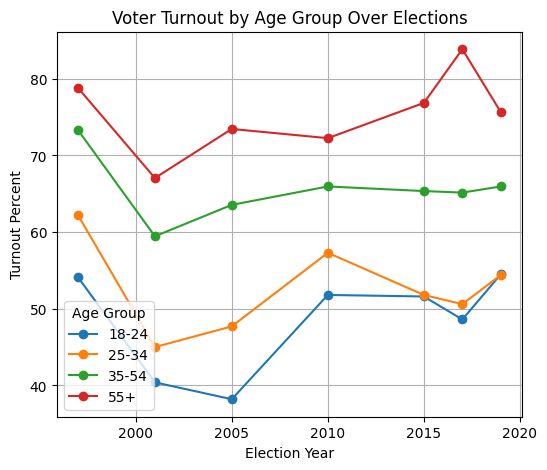

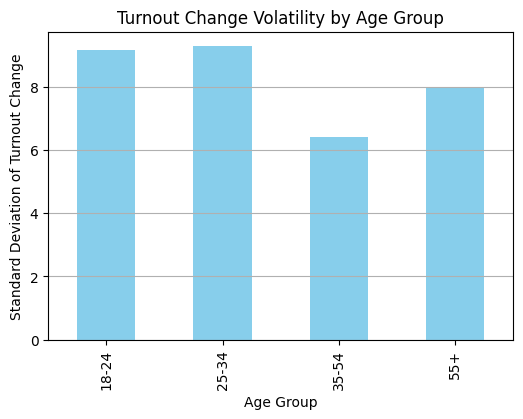

In [26]:
import matplotlib.pyplot as plt

# 1. Line plot of Turnout_Percent by Age Group over years
plt.figure(figsize=(6,5))
for age_group in election['Age_Group'].unique():
    subset = election[election['Age_Group'] == age_group]
    plt.plot(subset['Election_Year'], subset['Turnout_Percent'], marker='o', label=age_group)
plt.title("Voter Turnout by Age Group Over Elections")
plt.xlabel("Election Year")
plt.ylabel("Turnout Percent")
plt.legend(title="Age Group")
plt.grid(True)
plt.show()

# 2. Bar plot of Turnout Change volatility by Age Group
plt.figure(figsize=(6,4))
volatility_by_age.plot(kind='bar', color='skyblue')
plt.title("Turnout Change Volatility by Age Group")
plt.ylabel("Standard Deviation of Turnout Change")
plt.xlabel("Age Group")
plt.grid(axis='y')
plt.show()

**Observations: Turnout Trends by Age Group**

•	Voter turnout increases consistently with age across all election years.

•	The 18–24 group shows the lowest turnout and the highest fluctuations over time.

•	The 25–34 group performs slightly better but remains unstable across elections.

•	The 35–54 group shows relatively stable turnout with smaller variations.

•	The 55+ group consistently records the highest turnout in every election.

**Observations: Turnout Change Volatility**

•	Turnout volatility is highest for 18–24 and 25–34 age groups.

•	The 35–54 group has the lowest volatility, indicating the most consistent voting behaviour.

•	The 55+ group shows high turnout with moderate volatility.

**Key Insight**

•	Turnout stability increases with age.

•	Younger voters are both less consistent and more unpredictable, while older voters form the most reliable voting bloc.

**STEP 5: Insights & Implications**

•	18–24 & 25–34: low turnout, high volatility

•	35–54: stable turnout, low volatility

•	55+: high turnout, moderate volatility

•	Turnout stability rises with age

•	Younger voters drive overall instability

•	Older voters form the most reliable voting bloc

**STEP 6: Contribution of Age Groups to Overall Turnout Changes**

Determined which age groups contribute most to overall turnout swings across elections.

In [27]:
# Total absolute turnout change per age group
contribution = election.groupby('Age_Group')['Turnout_Change'].apply(lambda x: x.abs().sum())

# Sort to see which groups contribute most
contribution = contribution.sort_values(ascending=False)
contribution

,Turnout_Change
Age_Group,
25-34,40.00
55+,39.15
18-24,38.60
35-54,21.95


**Observations:**

•	25–34 age group causes the biggest overall turnout changes.

•	55+ group also affects turnout a lot.

•	18–24 contributes somewhat less than 55+.

•	35–54 is the most stable, changing the least.

•	In short: younger and older voters drive most of the fluctuations, middle-aged voters are steady.

**STEP 7: Trend Analysis by Age Group**

Check whether turnout for each age group is generally increasing, decreasing, or stable over time.

In [28]:
# Linear trend for each age group
import numpy as np

trend = {}
for age in election['Age_Group'].unique():
    subset = election[election['Age_Group'] == age]
    # Fit a simple linear trend: Turnout_Percent ~ Election_Year
    coef = np.polyfit(subset['Election_Year'], subset['Turnout_Percent'], 1)
    trend[age] = coef[0]  # slope

trend

{'18-24': np.float64(0.28607935440484195),
 '25-34': np.float64(-0.07770679219905677),
 '35-54': np.float64(-0.0851546738399428),
 '55+': np.float64(0.2575823806321494)}

**Observations:**

•	18–24: slight upward trend, turnout slowly increasing

•	25–34: small downward trend, nearly stable

•	35–54: very stable, minimal change

•	55+: moderate upward trend, consistently high turnout

•	Overall: middle-aged voters are stable, younger and older groups show small trends

**STEP 8: Cohort Tracking & What-if Analysis**


Tracked how turnout of the same cohort changes as they age, and simulate impact of increased turnout in a specific group.

**Cohort Tracking**

In [29]:
# Example: track 18–24 in 1997 across next elections
cohort_1997 = election[election['Age_Group'].isin(['18-24','25-34','35-54','55+'])]
cohort_1997 = cohort_1997.sort_values(['Age_Group','Election_Year'])
cohort_1997

,Election_Year,Age_Group,Turnout_Percent,Turnout_Change
0,1997,18-24,54.10,NaN
4,2001,18-24,40.40,-13.70
8,2005,18-24,38.20,-2.20
12,2010,18-24,51.80,13.60
16,2015,18-24,51.60,-0.20
20,2017,18-24,48.60,-3.00
24,2019,18-24,54.50,5.90
1,1997,25-34,62.20,NaN
5,2001,25-34,45.00,-17.20
9,2005,25-34,47.70,2.70


**What-if Scenario**

In [30]:
# Simulate 10% increase in 18-24 turnout
election_scenario = election.copy()
election_scenario.loc[election_scenario['Age_Group']=='18-24','Turnout_Percent'] *= 1.10

# Calculate new overall turnout change
overall_change_original = election['Turnout_Percent'].mean()
overall_change_scenario = election_scenario['Turnout_Percent'].mean()

overall_change_original, overall_change_scenario

(np.float64(60.528571428571425), np.float64(61.74))

**Observations:**

•	Cohort tracking shows younger voters fluctuate the most, but their participation stabilizes as they age.

•	Middle-aged voters remain consistently stable.

•	What-if scenario: increasing 18–24 turnout by 10% raises overall turnout from 60.53% → 61.74%.

•	Insight: Younger voters have high impact on total turnout, older voters provide a stable baseline.

**STEP 9: Advanced Visualizations/Annotated Plots**

Enhanced plots to highlight patterns, peaks, drops, and volatility for each age group. Makes insights immediately visible.

**Line Plot with Annotations**

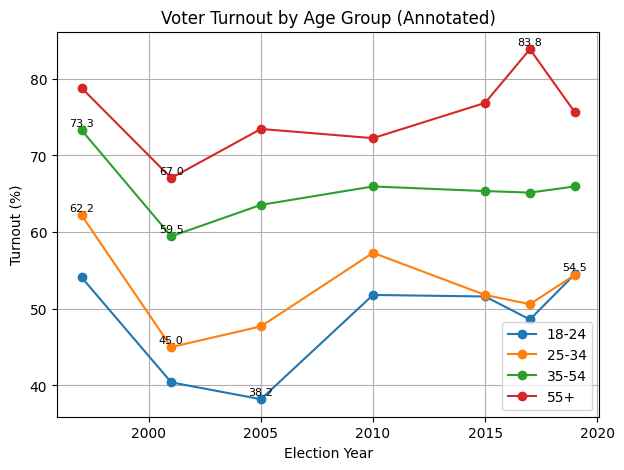

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

for age in election['Age_Group'].unique():
    subset = election[election['Age_Group']==age]
    plt.plot(subset['Election_Year'], subset['Turnout_Percent'], marker='o', label=age)

    # Annotate peaks and drops
    for i, val in enumerate(subset['Turnout_Percent']):
        if val == subset['Turnout_Percent'].max() or val == subset['Turnout_Percent'].min():
            plt.text(subset['Election_Year'].iloc[i], val+0.5, f"{val:.1f}", fontsize=8, ha='center')

plt.title('Voter Turnout by Age Group (Annotated)')
plt.xlabel('Election Year')
plt.ylabel('Turnout (%)')
plt.legend()
plt.grid(True)
plt.show()

**Bar Plot of Volatility with Highlights**

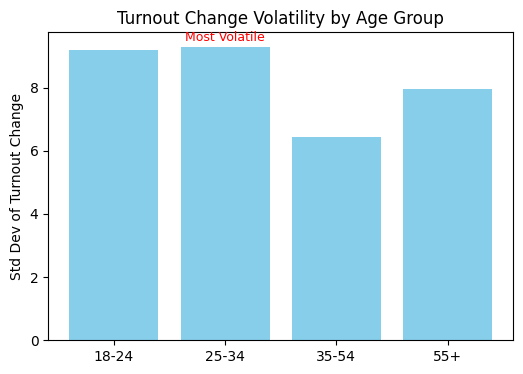

In [32]:
plt.figure(figsize=(6,4))
plt.bar(volatility_by_age.index, volatility_by_age.values, color='skyblue')
plt.title('Turnout Change Volatility by Age Group')
plt.ylabel('Std Dev of Turnout Change')

# Highlight the most unstable group
most_volatile = volatility_by_age.idxmax()
plt.text(most_volatile, volatility_by_age.max()+0.2, 'Most Volatile', ha='center', color='red', fontsize=9)
plt.show()

**Observations:**

•	Line plot shows younger groups fluctuate the most, older groups are stable.

•	Peaks and drops are highlighted, making key changes immediately visible.

•	Bar plot confirms 18–24 and 25–34 are most volatile, 35–54 is most stable.

•	Enhanced plots make patterns and anomalies clear, improving professional presentation.

## STEP 10: Project Summary & Key Takeaways

**Observations:**  
- **Voter turnout increases with age:** Older voters (55+) consistently have the highest turnout; younger voters (18–24) the lowest.  
- **Volatility decreases with age:** Younger groups fluctuate the most between elections; middle-aged (35–54) are most stable.  
- **Contribution to overall turnout changes:** 25–34 and 55+ age groups drive most of the changes; 35–54 contribute least.  
- **Trends over time:** Slight upward trend in 18–24 and 55+ turnout; middle-aged voters remain stable.  
- **Cohort tracking:** Young voters stabilize as they age, confirming age influences consistency.  
- **What-if scenario:** Increasing 18–24 turnout by 10% raises overall turnout from 60.53% → 61.74%, showing **strategic importance of engaging young voters**.  
- **Enhanced visualizations:** Annotated plots make patterns, peaks, and volatility immediately visible, improving clarity and professional presentation.  

**Overall Insight:**  
- Young voters are **hard to mobilize but highly influential**.  
- Middle-aged voters are **stable and reliable**.  
- Older voters are **habitually engaged with moderate responsiveness**.  
- Focusing on **engaging younger voters** can meaningfully improve overall turnout.